In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [2]:


# Load Iris dataset
iris = load_iris()
iris_data = iris.data
iris_target = iris.target


In [3]:


# Generate synthetic 3D dataset
np.random.seed(42)
mean = [0, 0, 0]
cov = [[1, 0.8, 0.6], [0.8, 1, 0.9], [0.6, 0.9, 1]]  # Correlated 3D data
data = np.random.multivariate_normal(mean, cov, 300)



In [4]:

# Manual PCA
def manual_pca(X, num_components=2):
    X_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(X_meaned, rowvar=False)
    eig_vals, eig_vecs = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eig_vals)[::-1]
    sorted_eigvecs = eig_vecs[:, sorted_index]
    eigvecs_subset = sorted_eigvecs[:, :num_components]
    X_reduced = np.dot(X_meaned, eigvecs_subset)
    return X_reduced



In [5]:

# Simple SOM implementation
def som_2d(data, grid_size=(10, 10), epochs=100, alpha=0.3, sigma=1.0):
    grid = np.random.rand(grid_size[0], grid_size[1], data.shape[1])
    for epoch in range(epochs):
        for sample in data:
            # Find Best Matching Unit (BMU)
            distances = np.linalg.norm(grid - sample, axis=2)
            bmu_idx = np.unravel_index(np.argmin(distances), grid.shape[:2])
            for i in range(grid_size[0]):
                for j in range(grid_size[1]):
                    dist_to_bmu = np.linalg.norm(np.array([i, j]) - np.array(bmu_idx))
                    if dist_to_bmu <= sigma:
                        influence = np.exp(-dist_to_bmu**2 / (2 * sigma**2))
                        grid[i, j] += alpha * influence * (sample - grid[i, j])
        alpha *= 0.95
        sigma *= 0.95
    return grid.reshape(-1, data.shape[1])



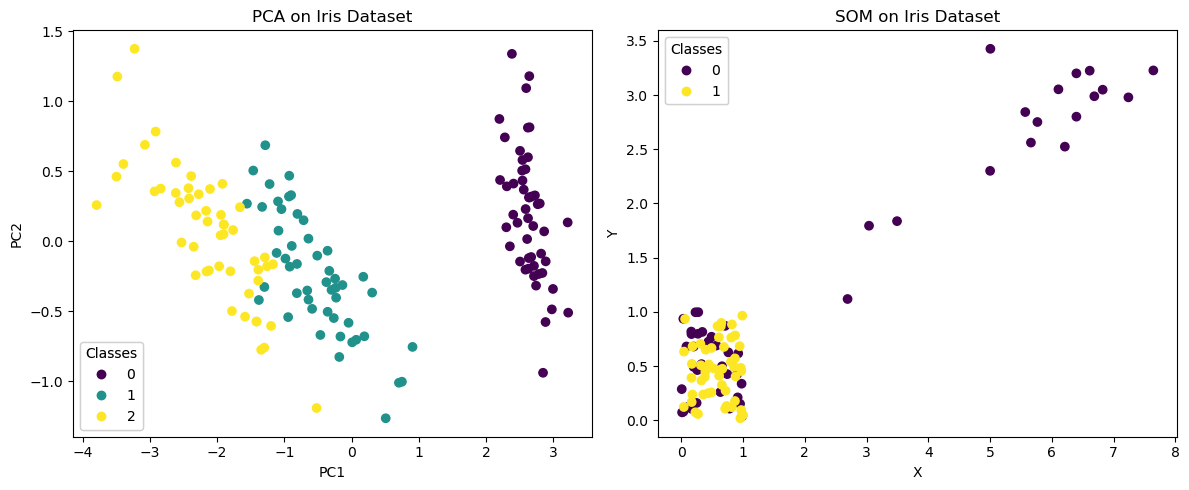

In [6]:

# Apply both techniques
iris_pca_result = manual_pca(iris_data)
iris_som_result = som_2d(iris_data)
 
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


scatter0 = axes[0].scatter(iris_pca_result[:, 0], iris_pca_result[:, 1], c=iris_target, cmap='viridis')
axes[0].set_title('PCA on Iris Dataset')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
legend1 = axes[0].legend(*scatter0.legend_elements(), title="Classes")
axes[0].add_artist(legend1)


scatter1 = axes[1].scatter(iris_som_result[:, 0], iris_som_result[:, 1], c=np.repeat(iris_target, (iris_som_result.shape[0] // iris_data.shape[0]) + 1)[:iris_som_result.shape[0]], cmap='viridis')
axes[1].set_title('SOM on Iris Dataset')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
legend2 = axes[1].legend(*scatter1.legend_elements(), title="Classes")
axes[1].add_artist(legend2)


plt.tight_layout()
plt.show()